In [1]:
import numpy
from matplotlib import pyplot
size = 7
%matplotlib inline

## Definition of the Pohlhausen profile

The Pohlhausen profile is used to generalize the flat plate profile to the case of curved boundaries or flows with external pressure graidients. The profile is defined as

$$ \frac u U = F(\eta)+\lambda G(\eta) , \quad \eta=\frac y\delta$$

where

$$ F = 2\eta-2\eta^3+\eta^4 $$
$$ G = \frac\eta 6 (1-\eta)^3 $$
$$ \lambda = \frac {\delta^2}\nu \frac{dU}{dx} $$

This can be easly defined using a set of python functions

In [2]:
def pohlF(eta):
    return 2*eta-2*eta**3+eta**4
def pohlG(eta):
    return eta/6*(1-eta)**3
def pohl(eta,lam):
    return pohlF(eta)+lam*pohlG(eta)

Let's take a look at how this changes with $\lambda$.

In [3]:
def pohlPlot(lam):
    pyplot.figure(figsize=(size,size))
    pyplot.xlabel('u/U', fontsize=16)
    pyplot.axis([-0.1,1.1,0,1])
    pyplot.ylabel('y/del', fontsize=16)
    eta = numpy.linspace(0.0,1.0,100)
    pyplot.plot(pohlF(eta),eta, lw=1, color='black')
    pyplot.plot(pohl(eta,lam),eta, lw=2, color='green')

**Change `lam` below to see how the profile changes compared to the flat plate value.** 

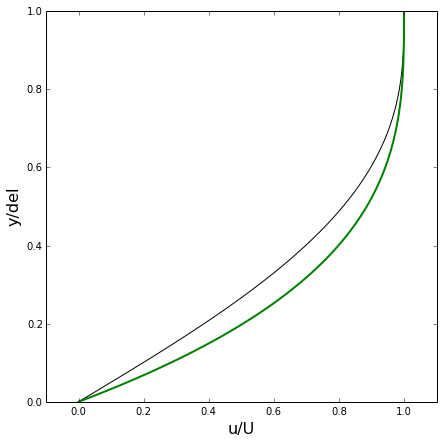

In [4]:
pohlPlot(lam=7)

We see $\lambda=-12$ is a special point at which the profile has zero derivative at the wall, ie $\tau_w=0$.

## Pohlhausen profile characteristics

We can easily define the characteristics of the Pohlhausen profile analytically. The displacement thickness is:

$$\delta_1 = \int_0^\delta \left(1-\frac uU\right)dy = \delta \left(1-\int_0^1 F(\eta) d\eta-\lambda \int_0^1G(\eta) d\eta \right)  $$
$$\frac{\delta_1}\delta = 1-[1-1/2+1/5]+\lambda/6[1/2-1+3/4-1/5] = \frac 3{10}-\frac\lambda{120}$$

The momentum thickness is:

$$\delta_2 = \int_0^\delta \frac uU\left(1-\frac uU\right)dy = \delta \left(\int_0^1 F-F^2+\lambda(G-FG)-(\lambda G)^2 d\eta\right)  $$
$$\frac{\delta_2}\delta = \frac{37}{315}-\frac\lambda{945}-\frac{\lambda^2}{9072}$$

And the friction coefficient is:

$$\frac 12 c_f = \frac\nu{U^2}\frac{\partial u}{\partial y} = \frac\nu{U\delta}\frac{\partial}{\partial\eta}( F+\lambda G)$$
$$\frac 12 c_f = \frac\nu{U\delta}\left(2+\frac\lambda 6\right)$$

## Determining the separation point

To determine $\lambda$, and find if/when $\lambda=-12$, we use the momentum integral equation

$$ \frac 12 c_f = \frac {\delta_1 + 2\delta_2}U\frac{dU}{dx}+\frac{d\delta_2}{dx}$$

where we substitute the values for $\delta_1,\delta_2$ and $\frac 12 c_f$ from above using $\lambda=\delta^2 U'/\nu$ . The result is an equation that we can integrate (numerically) from the leading stagnation point, given an initial condition.